2019-12-26T14:44:40+03:00

CPython 3.7.4
IPython 7.8.0

compiler   : MSC v.1915 64 bit (AMD64)
system     : Windows
release    : 10
machine    : AMD64
processor  : Intel64 Family 6 Model 71 Stepping 1, GenuineIntel
CPU cores  : 8
interpreter: 64bit


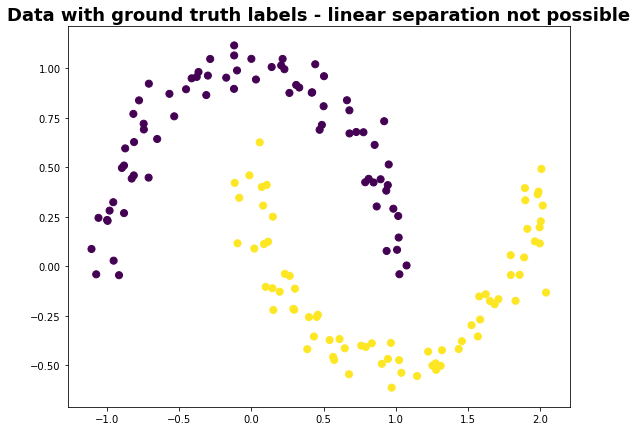

In [1]:
%load_ext watermark
import warnings
warnings.filterwarnings("ignore") 
from IPython.core.display import display, HTML
import time
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
%watermark
from sklearn.datasets import make_moons
random_state = 21
X_mn, y_mn = make_moons(150, noise=.07, random_state=random_state)
cmap = 'viridis'
dot_size=50
fig, ax = plt.subplots(figsize=(9,7))
ax.set_title('Data with ground truth labels - linear separation not possible', fontsize=18, fontweight='demi')
ax.scatter(X_mn[:, 0], X_mn[:, 1],c=y_mn,s=dot_size, cmap=cmap)

In [2]:
from sklearn.neighbors import radius_neighbors_graph
from sklearn.neighbors import kneighbors_graph
A = radius_neighbors_graph(X_mn,0.4,mode='distance', metric='minkowski', p=2, metric_params=None, include_self=False)
# A = kneighbors_graph(X_mn, 2, mode='connectivity', metric='minkowski', p=2, metric_params=None, include_self=False)
A = A.toarray()

In [3]:
A.shape

(150, 150)

In [4]:
A[:5,:5]

array([[0.        , 0.        , 0.        , 0.        , 0.23955829],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.23955829, 0.        , 0.        , 0.        , 0.        ]])

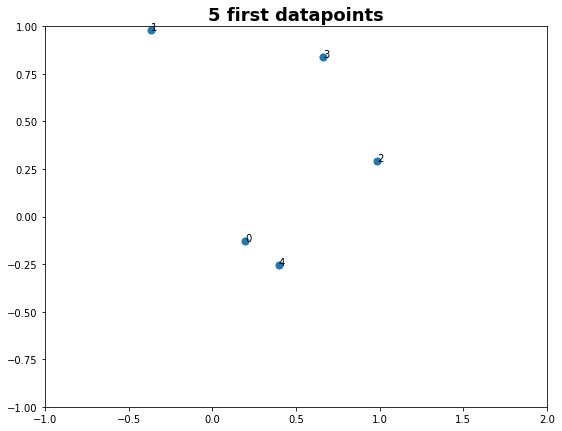

In [5]:
fig, ax = plt.subplots(figsize=(9,7))
ax.set_title('5 first datapoints', fontsize=18, fontweight='demi')
ax.set_xlim(-1, 2)
ax.set_ylim(-1,1)
ax.scatter(X_mn[:5, 0], X_mn[:5, 1],s=dot_size, cmap=cmap)
for i in range(5):
    ax.annotate(i, (X_mn[i,0],X_mn[i,1]))

In [6]:
from scipy.sparse import csgraph
L = csgraph.laplacian(A, normed=False)
L[:5,:5]

array([[ 3.8892734 , -0.        , -0.        , -0.        , -0.23955829],
       [-0.        ,  3.40126844, -0.        , -0.        , -0.        ],
       [-0.        , -0.        ,  3.00486906, -0.        , -0.        ],
       [-0.        , -0.        , -0.        ,  3.45831612, -0.        ],
       [-0.23955829, -0.        , -0.        , -0.        ,  4.06569259]])

In [8]:
eigval, eigvec = np.linalg.eig(L)
np.where(eigval == np.partition(eigval, 1)[1])# the second smallest eigenvalue



(array([1], dtype=int64),)

In [9]:
y_spec =eigvec[:,1].copy()
y_spec[y_spec < 0] = 0
y_spec[y_spec > 0] = 1
type(y_spec),y_mn.shape,y_spec.shape

(numpy.ndarray, (150,), (150,))

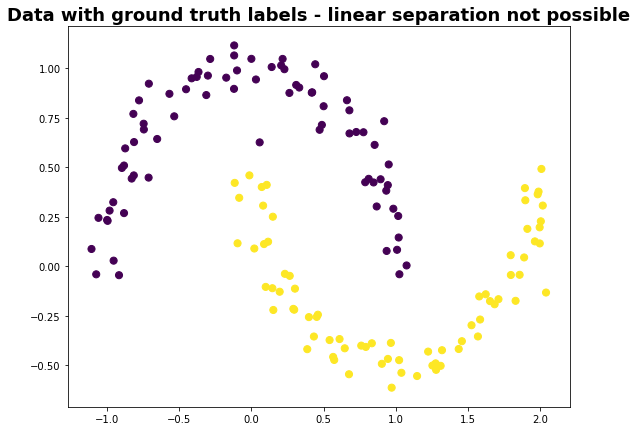

In [10]:
fig, ax = plt.subplots(figsize=(9,7))
ax.set_title('Data with ground truth labels - linear separation not possible', fontsize=18, fontweight='demi')
ax.scatter(X_mn[:, 0], X_mn[:, 1],c=y_spec ,s=dot_size, cmap=cmap)

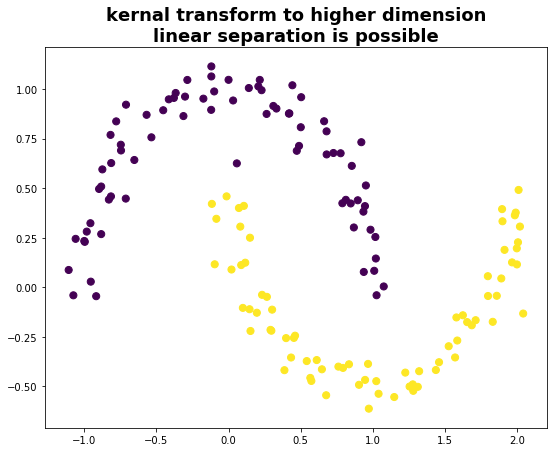

In [11]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',
                          assign_labels='kmeans')
labelsS = model.fit_predict(X_mn)
fig, ax = plt.subplots(figsize=(9,7))
ax.set_title('kernal transform to higher dimension\nlinear separation is possible', fontsize=18, fontweight='demi')
plt.scatter(X_mn[:, 0], X_mn[:, 1], c=labelsS, s=dot_size, cmap=cmap)